In [1]:
import cmlreaders as cml
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings; warnings.simplefilter('ignore')
pd.options.display.max_columns=None
pd.options.display.max_rows=100
from IPython.display import display, Markdown, HTML
import pandas_to_pybeh as pb
from tqdm import tqdm_notebook as lol
import time
import scipy
import rep_pybeh as rpb
from plotting import *
error_bars ={'elinewidth':3, 'capsize':6, 'capthick':3}

In [2]:
scalp = pd.read_csv('scalp_spc.csv')
hosp = pd.read_csv('hospital_spc.csv')
mturk = pd.read_csv('Mturk_spc.csv')
scalp.subject.nunique(), hosp.subject.nunique(), mturk.subject.nunique()

(7, 50, 314)

In [3]:
def plot_spc(one_spc, data_set, marker, color):
    spos_bins = []
    g1 = sns.lineplot(data = one_spc, x = 'spos_bins', y = 'recalled', 
                      err_style = 'bars', ci = 95, color = color, linewidth = 3.5, err_kws = error_bars)
    g1 = sns.scatterplot(data = one_spc.groupby('spos_bins').mean().reset_index(), x = 'spos_bins', y = 'recalled', color = color, s = 150, marker = marker,label = data_set)
    _ = plt.xlabel('Serial Position')
    _ = plt.ylabel('Recall Probability')
    labels=['1-3', '4-6', '7-9', '10-12', '13-15', '16-18', '19-21', '22-24', '25-27']
    plt.xticks(np.arange(1,10,1), labels=labels, rotation = -45, fontsize = 25)


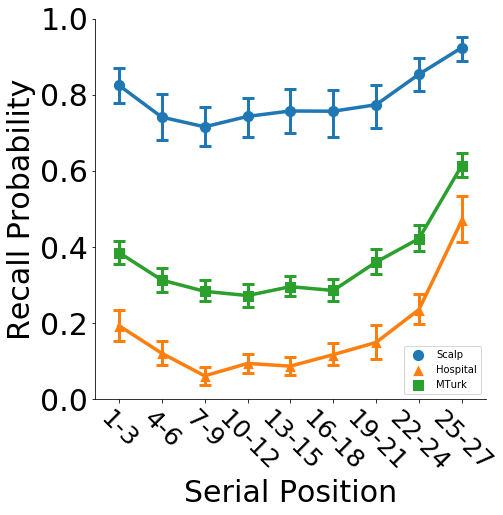

In [4]:
fig, ax = set_axes(figsize = (7, 7), xticks = np.arange(1, 28), yticks = np.arange(0, 1.1, .2), ylim=[0,1], fontsize = 30)

plot_spc(scalp, 'Scalp', 'o', 'C0')
plot_spc(hosp, 'Hospital', '^', 'C1')
plot_spc(mturk, 'MTurk', 's', 'C2')
plt.savefig('all_studies_spc.pdf', bbox_inches= 'tight')

In [5]:
mturk.subject.nunique()

314